In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import training as methods

In [21]:
####################
# LOADING THE DATA #
####################
SUBJECTS = ['AT', 'RB', 'RL']
SCENES = ['FlatWalkStraight']
TRIALS = ('all')

gait_cycles = methods.read_gait_cycles(SUBJECTS, SCENES, TRIALS)
df = pd.concat(gait_cycles).dropna()

Reading BW jogging_1.csv
Reading BW jogging_2.csv
Reading BW jogging_3.csv
Reading BW jogging_4_badStep.csv
Reading BW jogging_5.csv
Reading BW jogging_6_badForcePlate.csv
Reading BW jogging_7.csv
Reading BW jogging_8.csv
Reading Bw stop FW walking_1.csv
Reading Bw stop FW walking_2.csv
Reading Bw stop FW walking_3.csv
Reading Bw stop FW walking_4.csv
Reading Bw stop FW walking_5.csv
Reading Bw stop FW walking_6.csv
Reading Bw stop FW walking_7.csv
Reading BW walking_1_badForcePlate.csv
Reading BW walking_2.csv
Reading BW walking_4.csv
Reading BW walking_5.csv
Reading BW walking_6_badForcePlate.csv
Reading BW walking_7_badForcePlate.csv
Reading BW walking_8.csv
Reading BW-L walking_1.csv
Reading BW-L walking_2_badForcePlate.csv
Reading BW-L walking_3.csv
Reading BW-L walking_4_badForcePlate.csv
Reading BW-L walking_5_badForcePlate.csv
Reading BW-R walking_1_badForcePlate.csv
Reading BW-R walking_2.csv
Reading BW-R walking_3.csv
Reading BW-R walking_4.csv
Reading BW-R walking_5.csv
Read

In [22]:
############################
# FEATURE/LABEL EXTRACTION #
############################
def extract_features(df):
    # Drop labels
    X = df.drop(columns=['Fx_l','Fy_l','Fz_l', 'M_l', 'Fx_r','Fy_r','Fz_r', 'M_r'], axis=1)

    # Drop pressure columns
    P_cols = [col for col in X if col.startswith('P')]
    X = X.drop(columns=P_cols, axis=1)

    # Drop masks
    MASKS = [
    'fp1_l', 'fp1_r', 'fp2_l', 'fp2_r', 'fp3_l', 'fp3_r', 'fp4_l','fp4_r',
    'valid_mask_feet', # 0 = occluded markers
    'correct_mask_fp', # 0 = force plate gave bad prediction
    'correct_mask_ins' # 0 = foot incorrectly placed on force plate
    ]
    X = X.drop(columns=MASKS, axis=1)

    # Drop source file
    X = X.drop(columns=['trial'], axis=1)
    
    # Drop subject
    X = X.drop(columns=['subject'], axis=1)

    return X

# Features
X = extract_features(df)
X.columns

Index(['Ftot_l', 'CoPx_l', 'CoPy_l', 'Ftot_r', 'CoPx_r', 'CoPy_r', 'ax_l',
       'ay_l', 'az_l', 'angx_l',
       ...
       'angy_r_64ms', 'angz_r_64ms', 'vm_r_64ms', 'vm_l_64ms', 'vr_r_64ms',
       'vr_l_64ms', 'gm_r_64ms', 'gm_l_64ms', 'tfl_r_64ms', 'tfl_l_64ms'],
      dtype='object', length=338)

In [23]:
import importlib
import models.combined_regressor
importlib.reload(models.combined_regressor)

from models.combined_regressor import CombinedRegressor

combined_model = CombinedRegressor()
Fx_l, Fy_l, Fz_l, M_l, Fx_r, Fy_r, Fz_r, M_r = combined_model(X)

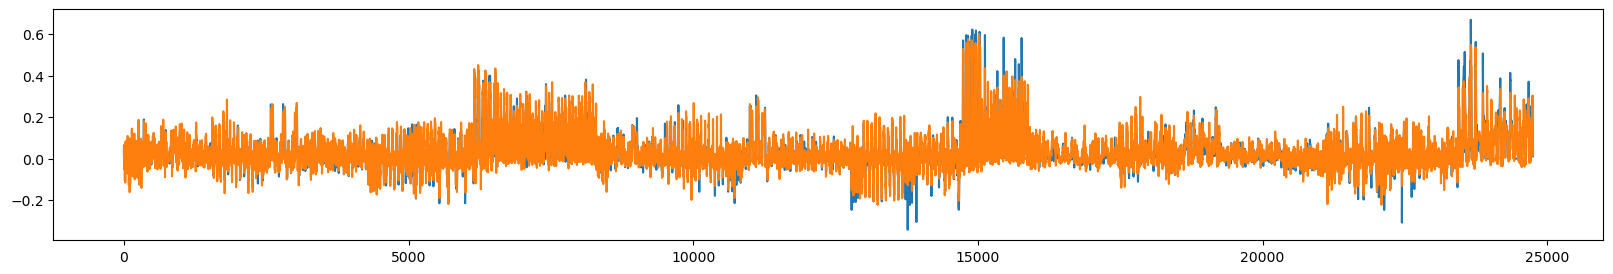

In [24]:
fig = plt.figure(figsize=(20, 3))
gs = fig.add_gridspec(1, 1, hspace=0.22)
axs = gs.subplots(sharex=True)

x = np.arange(df.index.values.size)
y = df['Fy_l']
y2 = Fy_l.detach().numpy()
axs.plot(x, y)
axs.plot(x, y2)